# The Sparks Foundation ( Data Science & Business Analytics Tasks )

## Task 4 : Exploratory Data Analysis - Terrorism
### Objective : In this task As a security/defense analyst, try to find out the hot zone of terrorism.

## NAME: DIMPLE P

### Importing Packages

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
os.chdir("C:\\Users\\dimple\\Documents")

### Loading Data

In [3]:
data = pd.read_csv('globalterrorismdb_0718dist_.csv',encoding='latin_1')
pd.set_option('display.max_columns', None)

C:\Users\dimple\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0

### Data Preparation

In [5]:
#Drop the id column
data.drop(['eventid'], axis=1, inplace=True)

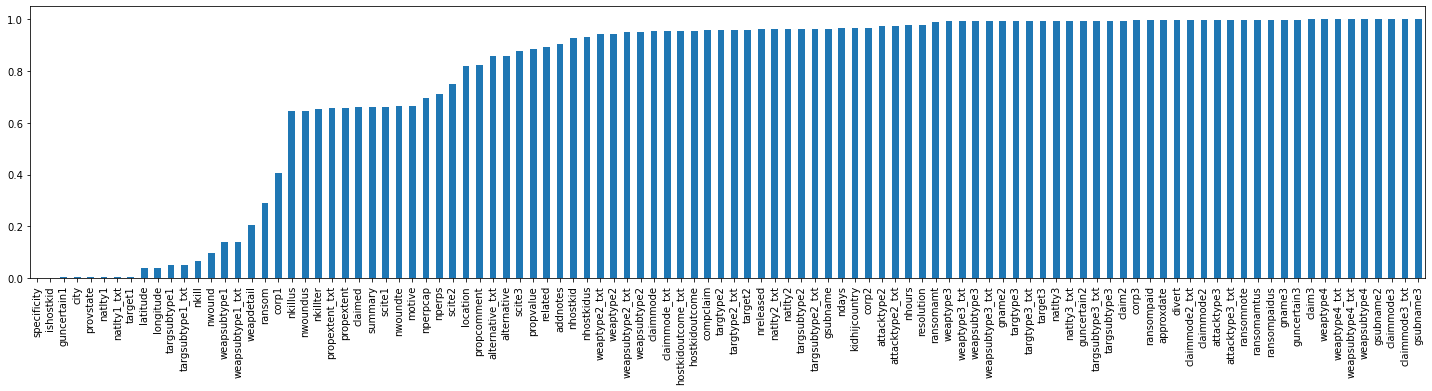

In [6]:
#Check Missing Values 
plt.figure(figsize=(25,5))
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()

In [7]:
#This would drop any column with less than 90% non-NA values.

data.dropna(thresh=int(data.shape[0] * .9), axis=1, inplace=True)

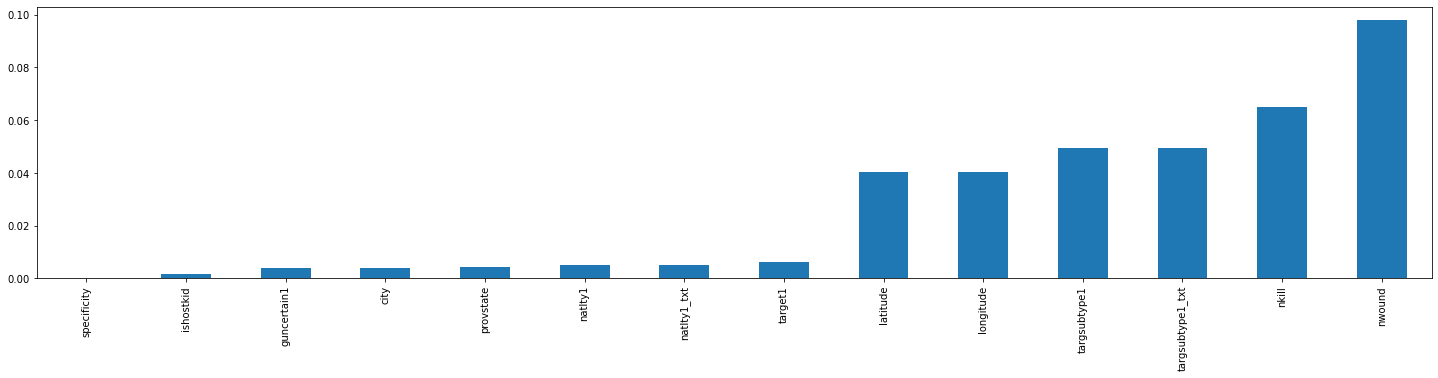

In [8]:
# Plotting missing values < 10%

plt.figure(figsize=(25,5))
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.show()

In [9]:
num = data.select_dtypes(exclude='object') ## Numerical Columns
cat = data.select_dtypes(include='object') ## Categorical Columns

In [10]:
## Basics statistical analysis and missing Values on numerical Columns.

display(num.head())
print('*'*100)
display(data.describe())
print('*'*100)
display(num.isnull().sum()/data.shape[0])

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,2,18.456792,-69.951164,1.0,0,1,1,1,0,0,1,0,1,14,68.0,58.0,0.0,0,13,1.0,0.0,0,0.0,0,0,0,0
1,1970,0,0,0,130,1,19.371887,-99.086624,1.0,0,1,1,1,0,0,1,0,6,7,45.0,21.0,0.0,0,13,0.0,0.0,0,1.0,0,1,1,1
2,1970,1,0,0,160,5,15.478598,120.599741,4.0,0,1,1,1,0,0,1,0,1,10,54.0,217.0,0.0,0,13,1.0,0.0,0,0.0,-9,-9,1,1
3,1970,1,0,0,78,8,37.997490,23.762728,1.0,0,1,1,1,0,0,1,0,3,7,46.0,217.0,0.0,0,6,NaN,NaN,1,0.0,-9,-9,1,1
4,1970,1,0,0,101,4,33.580412,130.396361,1.0,0,1,1,1,-9,0,1,0,7,7,46.0,217.0,0.0,0,8,NaN,NaN,1,0.0,-9,-9,1,1


****************************************************************************************************


,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,95950.000000,9.594900e+04,99996.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,95051.000000,99472.000000,99620.000000,99999.000000,99999.000000,93493.000000,90182.000000,99999.000000,99821.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1993.043650,6.462445,15.321843,0.03232,138.751418,6.316043,21.074554,-8.908357e+02,1.434177,0.062991,0.98735,0.990950,0.903839,-1.097971,0.107851,0.918869,0.019140,3.134791,8.185322,46.645380,126.223108,0.099016,0.002240,6.455425,2.371579,3.291632,-0.055541,0.064716,-4.231202,-4.190592,0.111141,-3.506535
std,10.593357,3.387556,8.812892,0.17685,126.120018,3.105993,21.915085,2.782377e+05,1.060572,0.265939,0.11176,0.094701,0.294813,3.178414,0.310194,0.273037,0.137018,1.908862,6.716901,32.272496,85.828054,0.298685,0.047276,2.207797,11.760604,47.401355,2.619124,0.345158,4.546665,4.600988,0.719860,4.631918
min,1970.000000,0.000000,0.000000,0.00000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.00000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1985.000000,4.000000,8.000000,0.00000,61.000000,3.000000,7.083241,-7.258465e+01,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,21.000000,69.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1992.000000,6.000000,15.000000,0.00000,98.000000,6.000000,26.900056,2.101223e+01,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,34.000000,98.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2003.000000,9.000000,23.000000,0.00000,167.000000,10.000000,36.528933,6.317778e+01,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,183.000000,0.000000,0.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2011.000000,12.000000,31.000000,1.00000,1003.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1003.000000,1.000000,1.000000,13.000000,1384.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


****************************************************************************************************


iyear           0.000000
imonth          0.000000
iday            0.000000
extended        0.000000
country         0.000000
region          0.000000
latitude        0.040490
longitude       0.040500
specificity     0.000030
vicinity        0.000000
crit1           0.000000
crit2           0.000000
crit3           0.000000
doubtterr       0.000000
multiple        0.000000
success         0.000000
suicide         0.000000
attacktype1     0.000000
targtype1       0.000000
targsubtype1    0.049480
natlty1         0.005270
guncertain1     0.003790
individual      0.000000
weaptype1       0.000000
nkill           0.065061
nwound          0.098171
property        0.000000
ishostkid       0.001780
INT_LOG         0.000000
INT_IDEO        0.000000
INT_MISC        0.000000
INT_ANY         0.000000
dtype: float64

In [11]:
## Frequency of Categorical Data and missing Values in Categorical Columns

display(cat.head())
print('*'*100)
display(cat.describe(include='all'))
print('*'*100)
display(cat.isnull().sum()/data.shape[0])

,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,weaptype1_txt,dbsource
0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,Unknown,PGIS
1,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,PGIS
2,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,Unknown,PGIS
3,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,Explosives,PGIS
4,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,Incendiary,PGIS


****************************************************************************************************


,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,weaptype1_txt,dbsource
count,99999,99999,99580,99607,99999,99999,95051,99383,99472,99999,99999,99999
unique,204,12,2490,19635,9,22,112,62785,209,2888,12,25
top,Colombia,Middle East & North Africa,Northern Ireland,Unknown,Bombing/Explosion,Private Citizens & Property,Police Security Forces/Officers,Military Unit,Colombia,Unknown,Explosives,PGIS
freq,7363,19050,3937,5896,45449,22148,6103,1533,6993,41476,46182,63740


****************************************************************************************************


country_txt         0.00000
region_txt          0.00000
provstate           0.00419
city                0.00392
attacktype1_txt     0.00000
targtype1_txt       0.00000
targsubtype1_txt    0.04948
target1             0.00616
natlty1_txt         0.00527
gname               0.00000
weaptype1_txt       0.00000
dbsource            0.00000
dtype: float64

In [12]:
## More info about dtypes in data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             99999 non-null  int64  
 1   imonth            99999 non-null  int64  
 2   iday              99999 non-null  int64  
 3   extended          99999 non-null  int64  
 4   country           99999 non-null  int64  
 5   country_txt       99999 non-null  object 
 6   region            99999 non-null  int64  
 7   region_txt        99999 non-null  object 
 8   provstate         99580 non-null  object 
 9   city              99607 non-null  object 
 10  latitude          95950 non-null  float64
 11  longitude         95949 non-null  float64
 12  specificity       99996 non-null  float64
 13  vicinity          99999 non-null  int64  
 14  crit1             99999 non-null  int64  
 15  crit2             99999 non-null  int64  
 16  crit3             99999 non-null  int64 

In [13]:
### Filling the missing Values
### Median to numerical columns and Mode to Categorical Columns

data = data.apply(lambda x:x.fillna(x.median()) if (x.dtype == 'float64' or x.dtype == 'int64') else x.fillna(x.value_counts().index[0]))

In [14]:
data.isnull().sum()

iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
weaptype1           0
weaptype1_txt       0
nkill               0
nwound              0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64

## 1.Frequency of Region and Counries ?


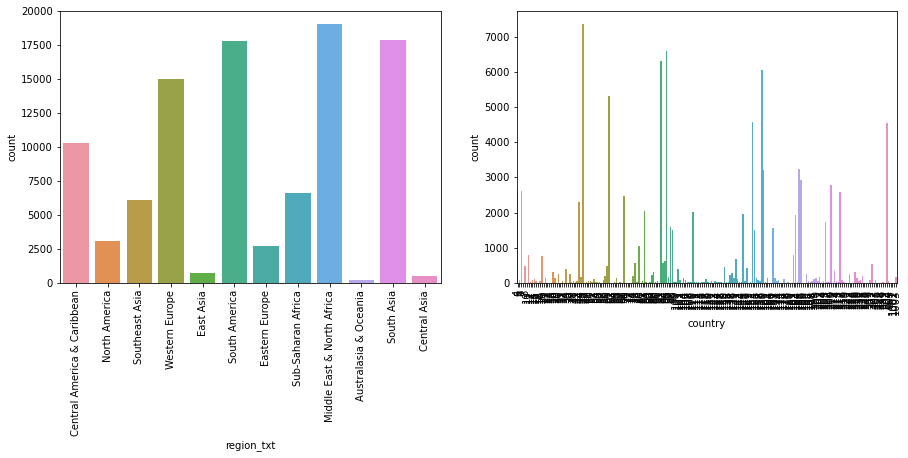

<Figure size 1440x576 with 0 Axes>

In [15]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.figure(figsize=(20,8))
g=sns.countplot(data['region_txt'], ax=ax[0])
plt.setp(g.get_xticklabels(), rotation=90)


h = sns.countplot(data['country'], ax=ax[1])
plt.setp(h.get_xticklabels(), rotation=90)
plt.show()

## 2.City Where Mostly People Died?

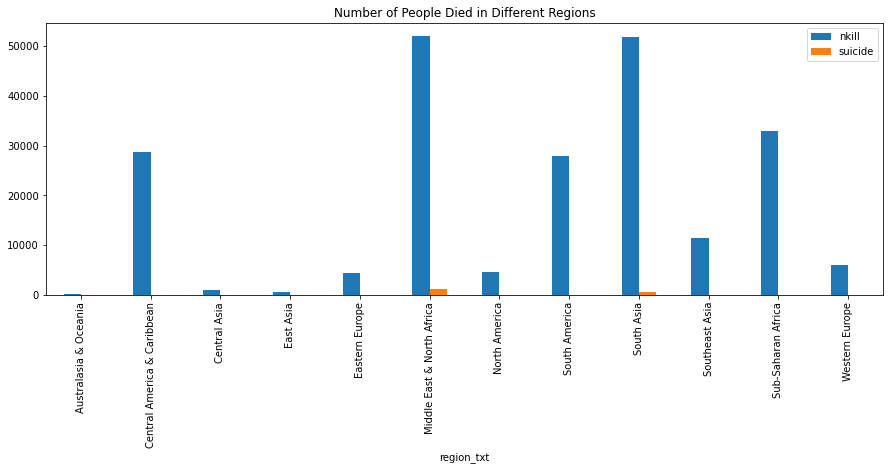

In [16]:
data.groupby('region_txt')['nkill','suicide'].sum().plot(kind='bar',figsize=(15,5))
plt.title('Number of People Died in Different Regions')
plt.show()

## 3.Frequency of Attack Type And Target Type?

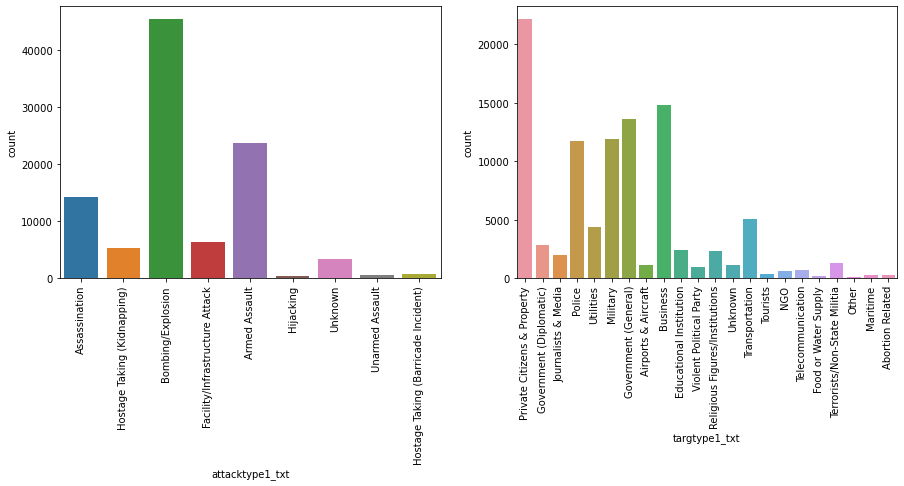

<Figure size 1440x576 with 0 Axes>

In [17]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.figure(figsize=(20,8))
g=sns.countplot(data['attacktype1_txt'], ax=ax[0])
plt.setp(g.get_xticklabels(), rotation=90)


h = sns.countplot(data['targtype1_txt'], ax=ax[1])
plt.setp(h.get_xticklabels(), rotation=90)
plt.show()

## 4.Which Subject Was Mostly Targeted By Terrorists and Kill Mostly Peoples.

,targsubtype1_txt,nkill
0,Military Unit/Patrol/Convoy,31207.0
1,Unnamed Civilian/Unspecified,25496.0
2,Police Security Forces/Officers,21686.0
3,Village/City/Town/Suburb,20256.0
4,Military Barracks/Base/Headquarters/Checkpost,7166.0
5,"Military Personnel (soldiers, troops, officers...",7092.0
6,Religion Identified,6124.0
7,Bus (excluding tourists),6005.0
8,"Police Building (headquarters, station, school)",5752.0
9,Place of Worship,4921.0


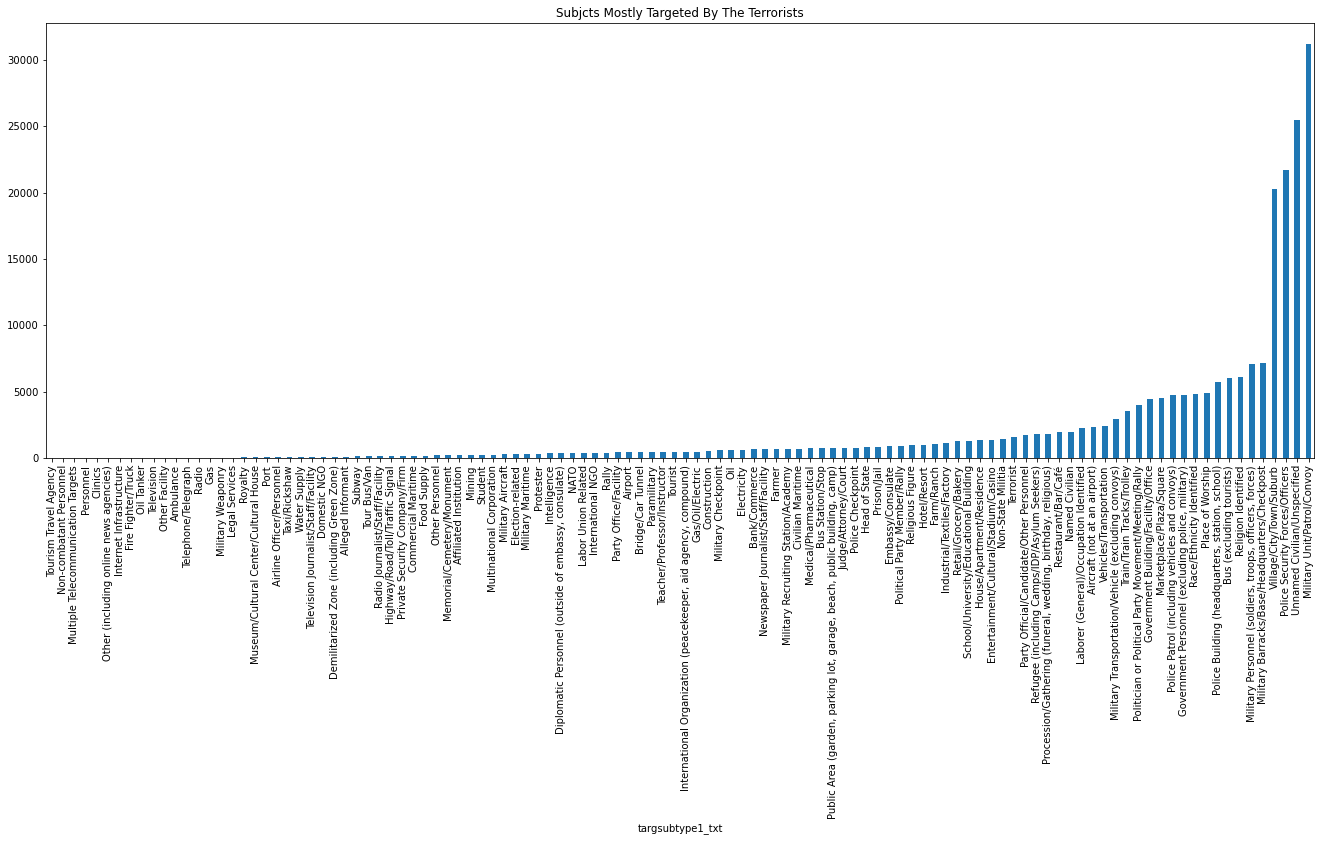

In [18]:
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
display(data.groupby('targsubtype1_txt')['nkill'].sum().sort_values().nlargest(10).reset_index())
data.groupby('targsubtype1_txt')['nkill'].sum().sort_values().plot.bar()
plt.title('Subjcts Mostly Targeted By The Terrorists')
plt.show()

## 5.How Many Attacks Was Successful and the Total Number of People Killed in those Attacks.

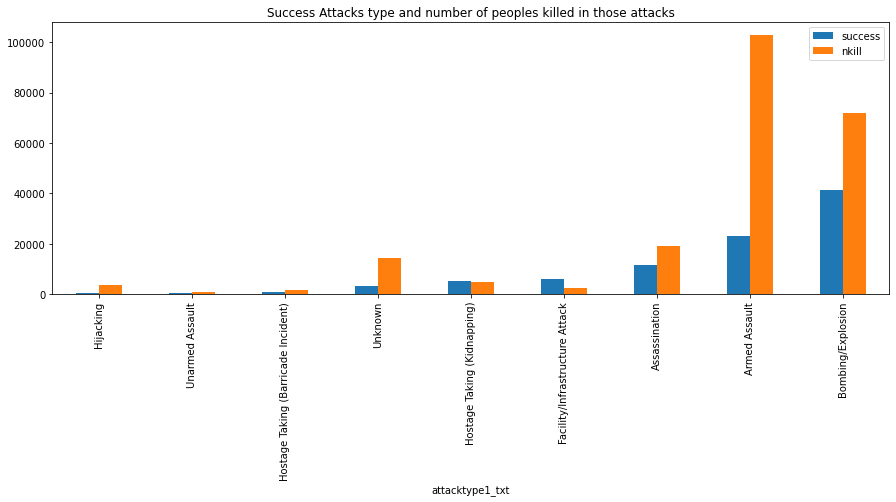

In [19]:
data.groupby('attacktype1_txt')['success','nkill'].sum().sort_values(by='success').plot(kind='bar',figsize=(15,5))
plt.title('Success Attacks type and number of peoples killed in those attacks')
plt.show()

## 6.Different Weapons Type Attacks Which was Successful and the Total Number of People Killed and Wounded in those Attacks .

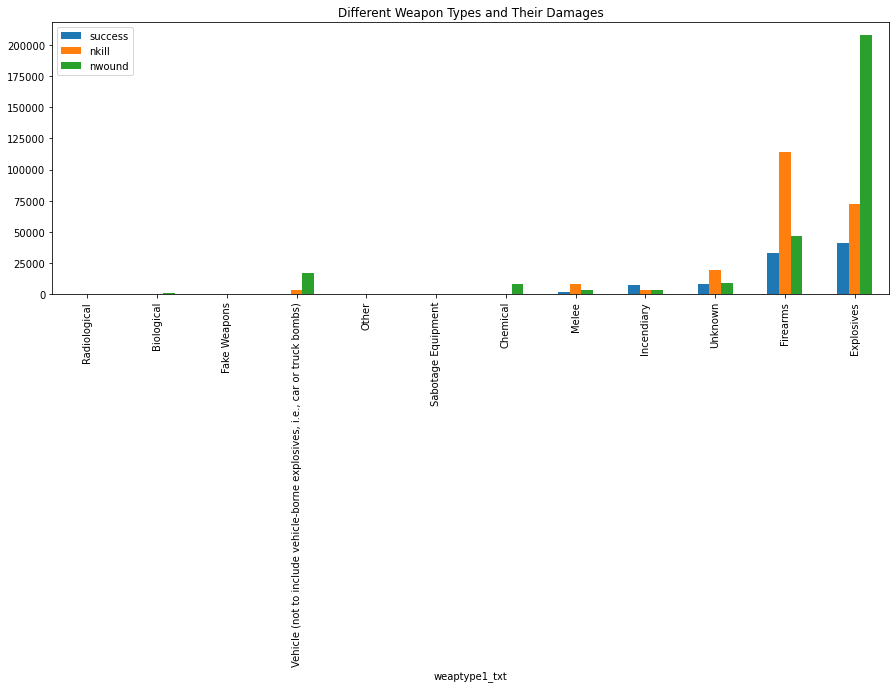

In [20]:
data.groupby('weaptype1_txt')['success','nkill','nwound'].sum().sort_values(by='success').plot(kind='bar',title='Different Weapon Types and Their Damages',figsize=(15,5));

## 7.Which Country is Most Affected and Number of Peoples Died because of Terrorsits Attack.

,country_txt,nkill,nwound
0,Iraq,25661.0,58117.0
1,India,16323.0,23940.0
2,Sri Lanka,15523.0,15447.0
3,Colombia,13970.0,8884.0
4,Peru,12726.0,4036.0
5,El Salvador,12053.0,5062.0
6,Algeria,10831.0,8893.0
7,Nicaragua,10593.0,1703.0
8,Pakistan,10350.0,20195.0
9,Philippines,6969.0,9175.0


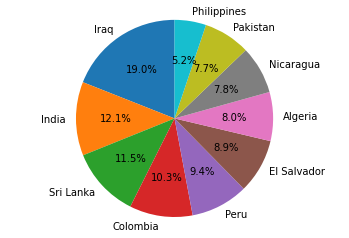

In [21]:
display(data.groupby('country_txt')['nkill','nwound'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').reset_index())
df = data.groupby('country_txt')['nkill'].sum().sort_values().nlargest(10)
df = pd.DataFrame({'Country':df.index, 'Kill':df})
plt.pie(df['Kill'], labels=df.index, shadow=False, startangle=90, autopct='%1.1f%%',) 
plt.axis('equal') 
plt.show()

## 8.In Which Year Mostly Number of Peoples Died and Wounded because of Terrorsits Attack?

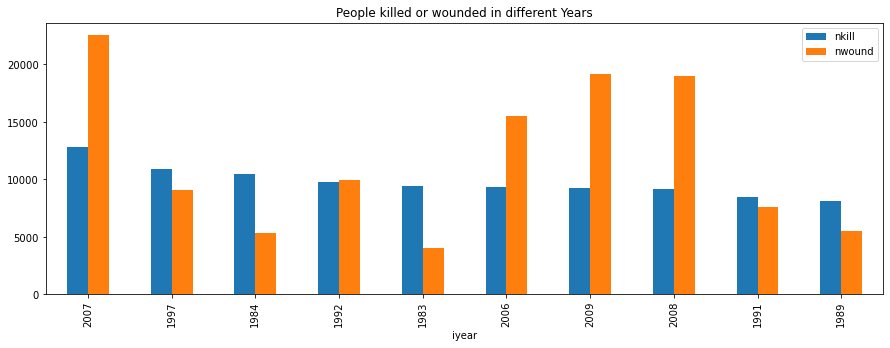

In [22]:
data.groupby('iyear')['nkill','nwound'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').plot(kind='bar',figsize=(15,5))
plt.title('People killed or wounded in different Years')
plt.show()

## 9.Loss in Property and Life in different Countries and Region

Text(0.5, 1.0, 'Loss In Property and Life in Different Regions')

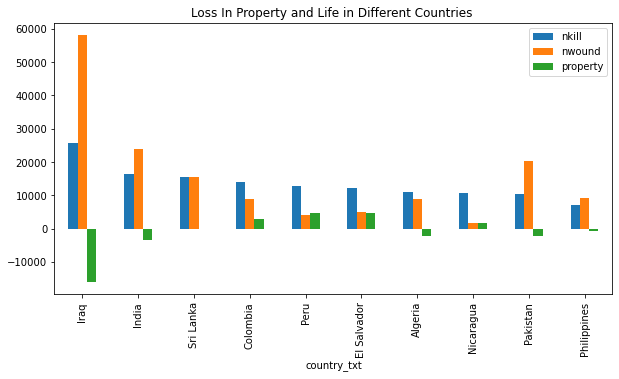

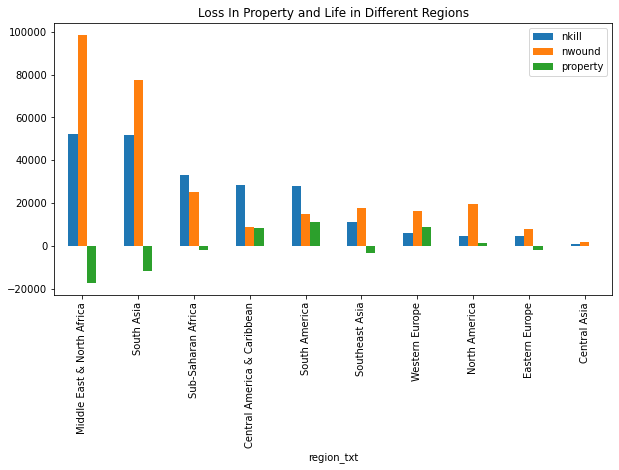

In [23]:
data.groupby('country_txt')['nkill','nwound','property'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').plot(kind='bar',figsize=(10,5));
plt.title('Loss In Property and Life in Different Countries ')


data.groupby('region_txt')['nkill','nwound','property'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').plot(kind='bar',figsize=(10,5));
plt.title('Loss In Property and Life in Different Regions')

## 10.Visualizing the Top Countries States Suffered From Terrorists Attacks.

,provstate,nkill,nwound,property
0,Unknown,14738.0,7096.0,1948
1,Baghdad,10985.0,27814.0,-7377
2,Eastern,6228.0,4736.0,-268
3,Northern,5936.0,3795.0,-365
4,Punjab,4646.0,7569.0,488
5,Northern Ireland,3993.0,3753.0,1603
6,Ayacucho,3697.0,698.0,724
7,Jammu and Kashmir,3520.0,7463.0,-1270
8,Antioquia,3422.0,2821.0,852
9,Diyala,3149.0,4582.0,-1823


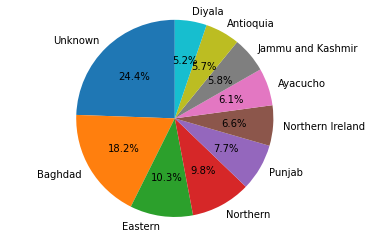

In [24]:
display(data.groupby('provstate')['nkill','nwound','property'].sum().sort_values(by='nkill').nlargest(10,columns='nkill').reset_index())
df = data.groupby('provstate')['nkill'].sum().sort_values().nlargest(10)
df = pd.DataFrame({'provstate':df.index, 'Kill':df})
plt.pie(df['Kill'], labels=df.index, shadow=False, startangle=90, autopct='%1.1f%%',) 
plt.axis('equal') 
plt.show()